# Do we need more Highly Rated Professors at UMD?

At the University of Maryland - College Park (UMD), students hope to be able produce "fearless ideas". As a result, most expect help and assistance from professors/lecturers who can easily explain and teach them lecture material. At the same time, they expect their skills to be challenged through projects and examinations that are within their potential. However, how many professors truly meet student expectations? Does UMD need more or does it already have a fair amount of good professors?

## Data Collection

To get our data, we'll need the following libraries:

In [1]:
import pandas as pd

Pandas is one of the most popular python libraries to analyse and manipulate data. It has a really helpful documentation at this link: https://pandas.pydata.org/docs/

In [2]:
import numpy as np

Numpy is one of the most popular python libraries to handle mathematical computations between multidimensional arrays and matrices. It also has a helpful documentation at this link: https://numpy.org/doc/stable/

In [3]:
import requests

We'll use the requests http library solely to scrape of the necessary data. In that regard, it's simple to use - go to this link if you want to get a feel for what it can do: https://requests.readthedocs.io/en/latest/user/quickstart/

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Matplotlib is one of the visualization libraries we'll use to .. well, visualize our data. It has a lovely documentation over at this link : https://matplotlib.org/stable/index.html

We first need to get the salary data of all UMD faculty. All UMD faculty salary data can be found at Diamondback's salary webpage over here: https://salaryguide.dbknews.com/. It was quite a pain to scrape all the data one by one through pagination using their API (you can try to do so on your own by reading up on how to use it here: https://api.dbknews.com/docs/). For that reason, I saved all of the data in a csv file and uploaded it onto the github repository for this webpage (you can go to https://raw.githubusercontent.com/1404mri/cmsc320final/main/data/umd_salaries.csv directly).

In [5]:
#Reading the data of umd salaries usings pandas and viewing the head
salary_data = pd.read_csv("https://raw.githubusercontent.com/1404mri/cmsc320final/main/data/umd_salaries.csv").drop(columns=["Unnamed: 0"])
salary_data.head()

,Division,Department,Title,Employee,Salary
0,Office of the\nPresident,PRES-President's Office,President,"Pines, Darryll J.","$791,966.25"
1,Office of the\nPresident,PRES-Intercollegiate Athletics,Head Coach,"Turgeon, Mark","$725,000.00"
2,Office of the\nPresident,PRES-Intercollegiate Athletics,Director of\nAthletics,"Evans, Damon","$675,649.56"
3,Office of the\nPresident,PRES-Intercollegiate Athletics,Head Coach BB,"Frese, Brenda S.","$666,600.00"
4,Office of the\nPresident,PRES-Intercollegiate Athletics,Asst Coach,"Stewart, Brian","$550,000.00"


An issue with the salary data is that because the salary data does **NOT** contain any ratings and the aim of the project is to find *good* professors, we'll need to use another dataset that contains the ratings for every (or most) professors. There's a well-known website at UMD that contains data on professor ratings specifically for UMD called *PlanetTerp* .

PlanetTerp is a website where students at UMD can place reviews and ratings for various professors that teach a particular course. It is a useful tool for 
students at UMD especially those who are signing up for classes since they can search up either a professor or courseID and determine which professor is 
rated as "good" for a particular course. The rating is based of a five star system where a professor with rating 1 or 1.5 is deemed *bad* while a professor
with a rating of 4.5 or 5.0 is deemed *excellent*. More information about planetterp can be seen here: https://planetterp.com/<br><br>

Fortunately PlanetTerp has their own API which can be used to scrape data about professors, grades, and/or courses, which can be found here: https://planetterp.com/api/. 

Unfortunately, to use PlanetTerp's API, the only way to get all professor entries is to use the "offset" parameter and use multiples of 100 (per request, you can only get up to 100 professor data). There's 11,845 professors included at PlanetTerp which means we'll need to do 118 requests. This takes some time so to understand how much progress is made along the way, I am using a good old progress bar from the tqdm library. You can check out all the things you can do with it over on the library's github page https://github.com/tqdm/tqdm#documentation or this blog post https://www.analyticsvidhya.com/blog/2021/05/how-to-use-progress-bars-in-python/

In [6]:
from tqdm import tqdm

In [7]:
#Getting the ratings of professors from planetterp 
ratings = [] # will be a list of pd dataframes
for i in tqdm(range(119)): # 118 requests!
    ratings.append(
        pd.DataFrame(requests.get("https://planetterp.com/api/v1/professors",params={"reviews": "true", "offset": str(i * 100)}).json())
    ) # sets the offset to skip the past i * 100 professors already loaded; review = true to count number of reviews

100%|█████████████████████████████████████████| 119/119 [01:54<00:00,  1.04it/s]


In [8]:
#Organizing the collected data from planetterp into a dataframe 
ratings = pd.concat(ratings).reset_index(drop = True)
ratings 

,courses,average_rating,type,reviews,name,slug
0,"[INST737, ENPM808W, ENPM808W, ENPM808W]",NaN,professor,[],A Seyed,seyed
1,"[MUSC800W, MUSC830W, MUSC830W]",NaN,professor,[],Aaron Goldman,goldman_aaron
2,"[THET678, THET499]",NaN,professor,[],Aaron Posner,posner
3,"[NFSC431, NFSC679R, NFSC112, HLTH672, HLTH710,...",5.0,professor,"[{'professor': 'Abani Pradhan', 'course': None...",Abani Pradhan,pradhan
4,"[CMLT235, ENGL101, ENGL234, ENGL101H, AASP298L]",NaN,professor,[],Abbey Morgan,morgan_abbey
...,...,...,...,...,...,...
11841,[],5.0,ta,"[{'professor': 'Nathan McLane', 'course': 'CHE...",Nathan McLane,mclane_nathan
11842,[],5.0,ta,"[{'professor': 'Dominc Brady', 'course': 'BSCI...",Dominc Brady,brady_dominc
11843,[],5.0,professor,"[{'professor': 'Emma Newton', 'course': 'COMM1...",Emma Newton,newton_emma
11844,[],5.0,ta,"[{'professor': 'Tyler Clark', 'course': 'MATH2...",Tyler Clark,clark_tyler


## Data Cleaning 

In order to clean the data, I will perform the following:<br><br>
        **The Salary Data**<br>
            1. In the salary data, salaries are formated as type strings. In order to make further operations that will be performed later in this tutorial, the strings got converted into type float by using the apply() function. <br>
            2. Any employee that was recorded more than once in the data was removed using the drop_duplicates() function.<br> 
            
**The Rating Data**<br>
            1. After loading the data into an array, the array was organized into a dataframe and was merged with the salaries dataframe based on the professor's name<br>
            2. Because the subject of interest are professors rather than teaching assistants, only the rows containing professors need to be selected. 
            3. Finally, rows with all missing ratings (labelled as NaN) need to be removed. 
       

In [9]:
#Converting the salary column from type String to type float
salary_data["Salary"] = salary_data["Salary"].apply(lambda x : float(x.replace('$', '').replace(',', '')))
salary_data['Salary']

0        791966.25
1        725000.00
2        675649.56
3        666600.00
4        550000.00
           ...    
10237      1984.39
10238      1883.77
10239      1251.54
10240      1147.08
10241       649.39
Name: Salary, Length: 10242, dtype: float64

In [10]:
#Removing any duplicate employees present
salary_data.drop_duplicates(['Employee'],inplace=True)

In [11]:
#Transforming the reviews column to the number of reviews for that professor
ratings["reviews"] = ratings["reviews"].apply(lambda x: len(x))
ratings

,courses,average_rating,type,reviews,name,slug
0,"[INST737, ENPM808W, ENPM808W, ENPM808W]",NaN,professor,0,A Seyed,seyed
1,"[MUSC800W, MUSC830W, MUSC830W]",NaN,professor,0,Aaron Goldman,goldman_aaron
2,"[THET678, THET499]",NaN,professor,0,Aaron Posner,posner
3,"[NFSC431, NFSC679R, NFSC112, HLTH672, HLTH710,...",5.0,professor,1,Abani Pradhan,pradhan
4,"[CMLT235, ENGL101, ENGL234, ENGL101H, AASP298L]",NaN,professor,0,Abbey Morgan,morgan_abbey
...,...,...,...,...,...,...
11841,[],5.0,ta,1,Nathan McLane,mclane_nathan
11842,[],5.0,ta,1,Dominc Brady,brady_dominc
11843,[],5.0,professor,1,Emma Newton,newton_emma
11844,[],5.0,ta,1,Tyler Clark,clark_tyler


In [12]:
#Removing the ratings of the TAs and focusing on only professor rating 
ratings = ratings[ratings["type"] == "professor"]

In [13]:
#Reformatting the professor names to then combine the rating and salary datasets 
salary_data["name"] = salary_data["Employee"].apply(lambda x : x.split(", ")[1].split(" ")[0] + " " + x.split(", ")[0] if ", " in x else x.split(" ")[0])
data = pd.merge(salary_data, ratings, on="name")

In [14]:
data.head()

,Division,Department,Title,Employee,Salary,name,courses,average_rating,type,reviews,slug
0,Office of the\nPresident,PRES-President's Office,President,"Pines, Darryll J.",791966.25,Darryll Pines,"[ENES181, UNIV110, UNIV110]",4.1667,professor,6,pines
1,Sr VP\nAcademic\nAffairs &\nProvost,SVPAAP-SVP Sr VP Academic\nAffairs & Provost,Senior VP &\nProvost,"Rice, Jennifer King",517625.00,Jennifer Rice,"[EDPS676, EDPS615, EDPS788E, EDPS679]",NaN,professor,0,rice_jennifer
2,"College of\nComputer, Math\n& Natural\nSciences",CMNS-Physics,Dist Univ Prof &\nDirector,"Das Sarma, Sankar",463922.29,Sankar Das Sarma,"[PHYS839A, PHYS739, PHYS739, PHYS839A, PHYS739...",NaN,professor,0,sarma
3,Robert H. Smith\nSchool of\nBusiness,BMGT-Finance,Professor,"Kyle, Albert S.",459441.69,Albert Kyle,"[BUFN773, BMGT840, BMGT848M, BUFN758X, BUFN721...",3.0000,professor,2,kyle
4,Robert H. Smith\nSchool of\nBusiness,BMGT-Finance,Professor,"Maksimovic, Vojislav",454285.13,Vojislav Maksimovic,"[BMGT340F, BMGT340H, BUFN752, BUSM741, BMGT848...",NaN,professor,0,maksimovic


In [15]:
data["average_rating"].count()

1737

In [16]:
ratings["average_rating"].count()

3003

In [17]:
#Removing null ratings
data = data.sort_values(by="average_rating", ascending=False)[data["average_rating"].notnull()]
# Replacing department names with their abbreviations
data["Department"] = data["Department"].apply(lambda x: x.split("-")[0])
data.head()

/tmp/ipykernel_49882/295445938.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.sort_values(by="average_rating", ascending=False)[data["average_rating"].notnull()]
/tmp/ipykernel_49882/295445938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Department"] = data["Department"].apply(lambda x: x.split("-")[0])


,Division,Department,Title,Employee,Salary,name,courses,average_rating,type,reviews,slug
1820,College of Arts\n& Humanities,ARHU,Associate\nProfessor,"Arsenjuk, Luka",88397.97,Luka Arsenjuk,"[FREN699I, SLLC368B, SLLC343, SLLC361, FILM302...",5.0,professor,2,arsenjuk
1393,College of Arts\n& Humanities,ARHU,Associate\nProfessor,"Namkoong, Kang",106276.58,Kang Namkoong,"[COMM498I, COMM398E, COMM402, COMM738B, COMM39...",5.0,professor,1,namkoong
675,Sr VP\nAcademic\nAffairs &\nProvost,SVPAAP,Professor,"Culver, James N.",153578.10,James Culver,"[HONR269V, PLSC489W, PLSC689W, PLSC399, PLSC61...",5.0,professor,3,culver
2633,Undergraduate\nStudies,UGST,Adm Couns,"Truong, Lynn Mai",54973.89,Lynn Truong,[UNIV100],5.0,professor,1,truong_lynn
681,College of\nAgriculture &\nNatural\nResources,AGNR,Professor,"Tablante, Nathaniel L. JR",153115.23,Nathaniel Tablante,"[ANSC398V, ANSC489A, HONR268Z, VMSC700, ANSC43...",5.0,professor,1,tablante


## Data Representation 

In order to best represent the data, I have chosen to use a histogram. A histogram is a plot that shows the frequency of a variable is <br>
present in a dataset. I chose this kind of representation because this tutorial is concerned about how many professors are actually "good" <br>
at UMD and whether UMD needs more good professors. Thus, the best way to visualize this scheme is to use a histogram that shows the number<br>
of professors with higher/lower ratings. 

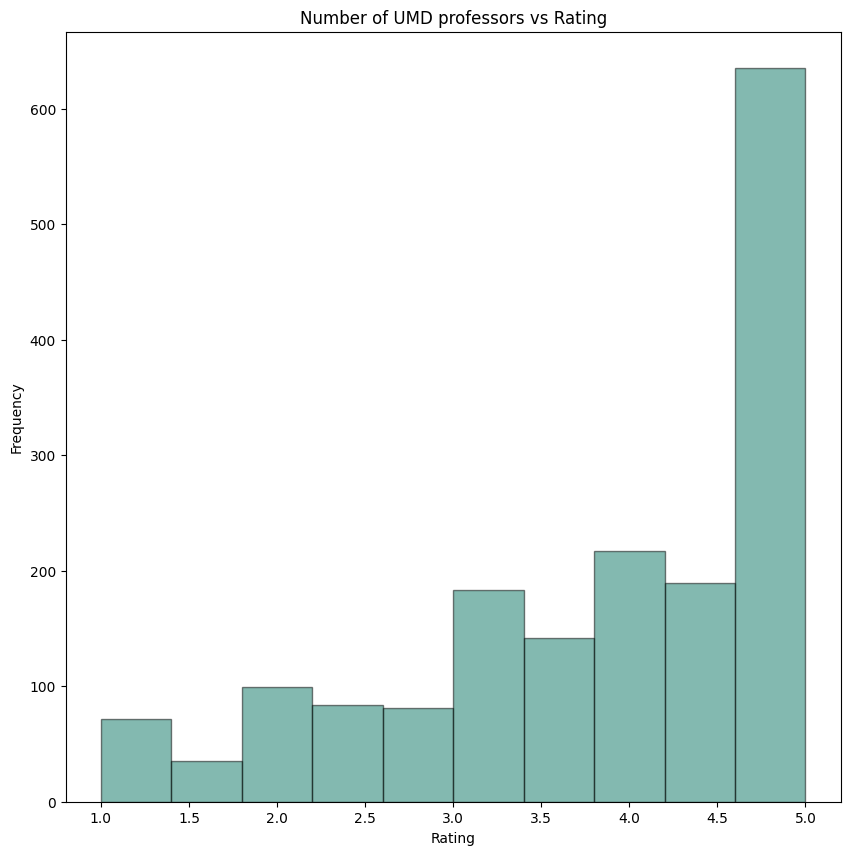

In [18]:
#Creating the histogram 
fig, ax = plt.subplots(figsize= (10,10))
ax.hist(data['average_rating'],alpha = 0.5, color = "#097562",edgecolor = "black")
#Setting title and axis labels 
plt.title("Number of UMD professors vs Rating")
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.show()

Based on this histogram I can see that a large amount of professors at UMD actually have a rating of 5.0 (which is a good sign), while the rest are mostly ranging between a rating 
of 3.0-4.5.

## Exploratory Data Analysis

After looking at the histogram that displayed the number of professors with each rating two main questions have arised in my mind: <br>
    1. "Are all departments have evenly distributed ratings and if not, which department seems to be prioritized and which seems to be undermined?": Although most professors seem to be rated very highly, most of them might be part of the same department.
       <br>
    2. "Do professors get 'better' with their reviews as their salaries increase?" 
    
In this section, I will try to explore these variables and answer these questions!

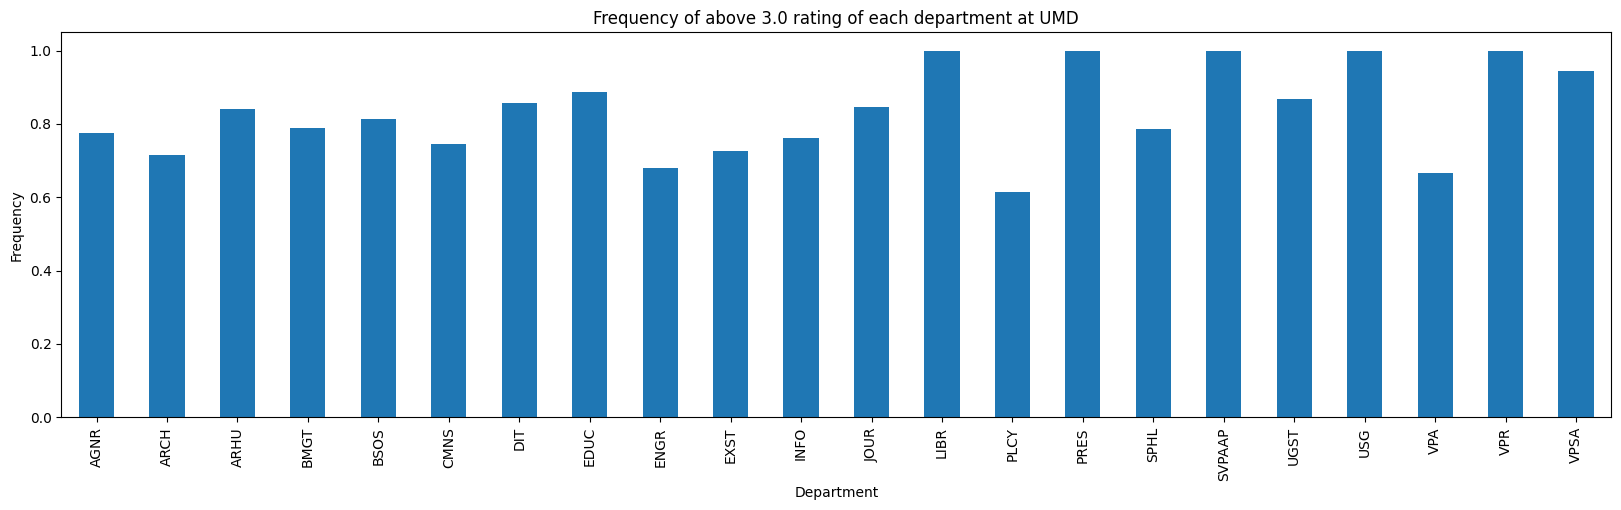

In [19]:
#Looking at the percentage of professors in each department with rating above 3.0 
fig, ax = plt.subplots(figsize = (20,5))
(data["Department"][data["average_rating"] >= 3].value_counts()/data["Department"].value_counts()).plot(ax=ax, kind='bar')
plt.title("Frequency of above 3.0 rating of each department at UMD")
plt.xlabel("Department") 
plt.ylabel("Frequency") 
plt.show()

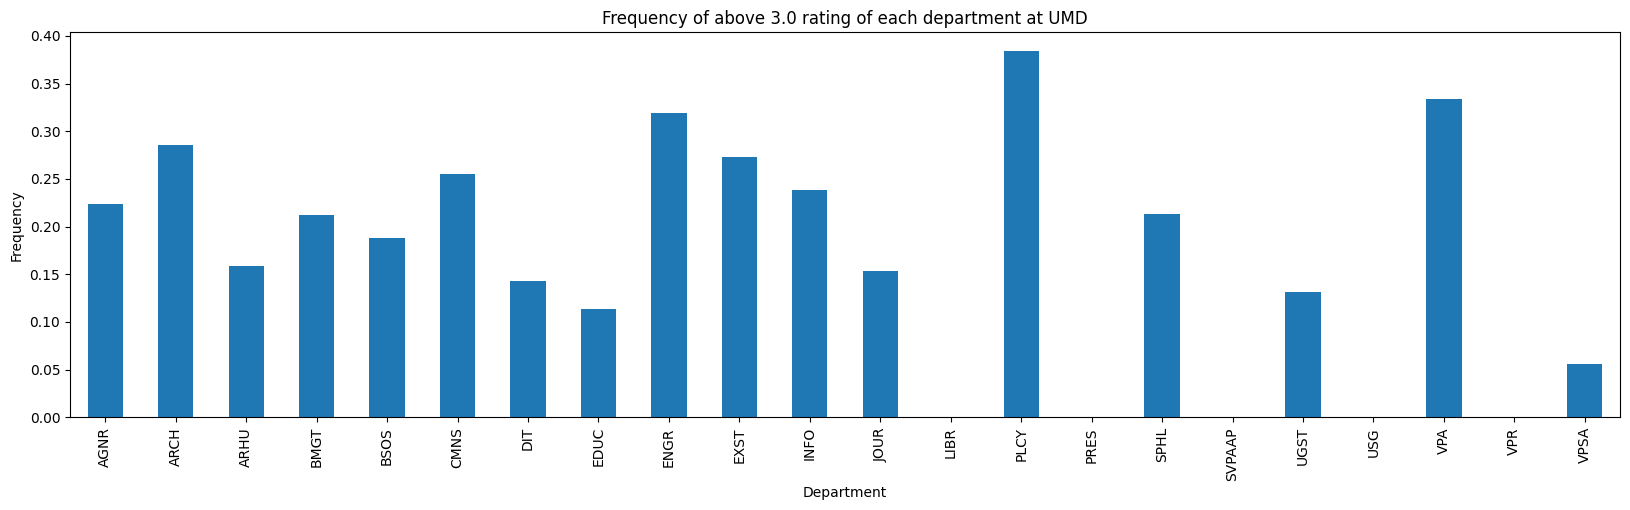

In [20]:
#Looking at the percentage of professors in each department with rating above 3.0 
fig, ax = plt.subplots(figsize = (20,5))
(data["Department"][data["average_rating"] < 3].value_counts()/data["Department"].value_counts()).plot(ax=ax, kind='bar')
plt.title("Frequency of above 3.0 rating of each department at UMD")
plt.xlabel("Department") 
plt.ylabel("Frequency") 
plt.show()

To answer my first question, I plotted two histograms one of which observes the proportion of professors in each department that have a rating of at least 3.0 and the other shows the proportion
of professors in each department with ratings below 3.0. Looking at these histograms, I can see that the PLCY department has a significantly high proportion of professors with bad ratings about 0.4 compared to other departments and a low proportion of professors with good ratings (about 0.6) compared to other departments. In contrast, I notice that certain departments such as the LIBR, and USG departments don't have any proportion of professors rated below  3 stars.


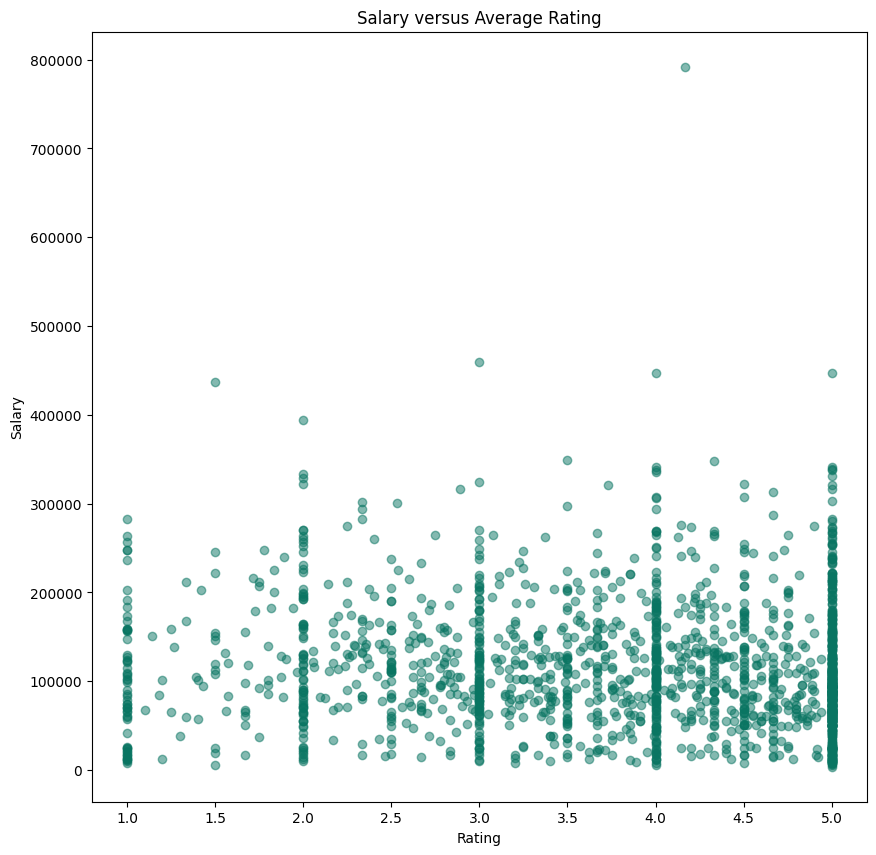

In [23]:
# Looking at the salaries and ratings for all departments using a scatterplot 
fig, ax = plt.subplots(figsize= (10,10))
ax.scatter(data['average_rating'],data['Salary'],alpha = 0.5, color = "#097562")
#Setting title and axis labels 
plt.title("Salary versus Average Rating")
plt.xlabel('Rating')
plt.ylabel("Salary")
plt.show()

<Figure size 40000x40000 with 0 Axes>

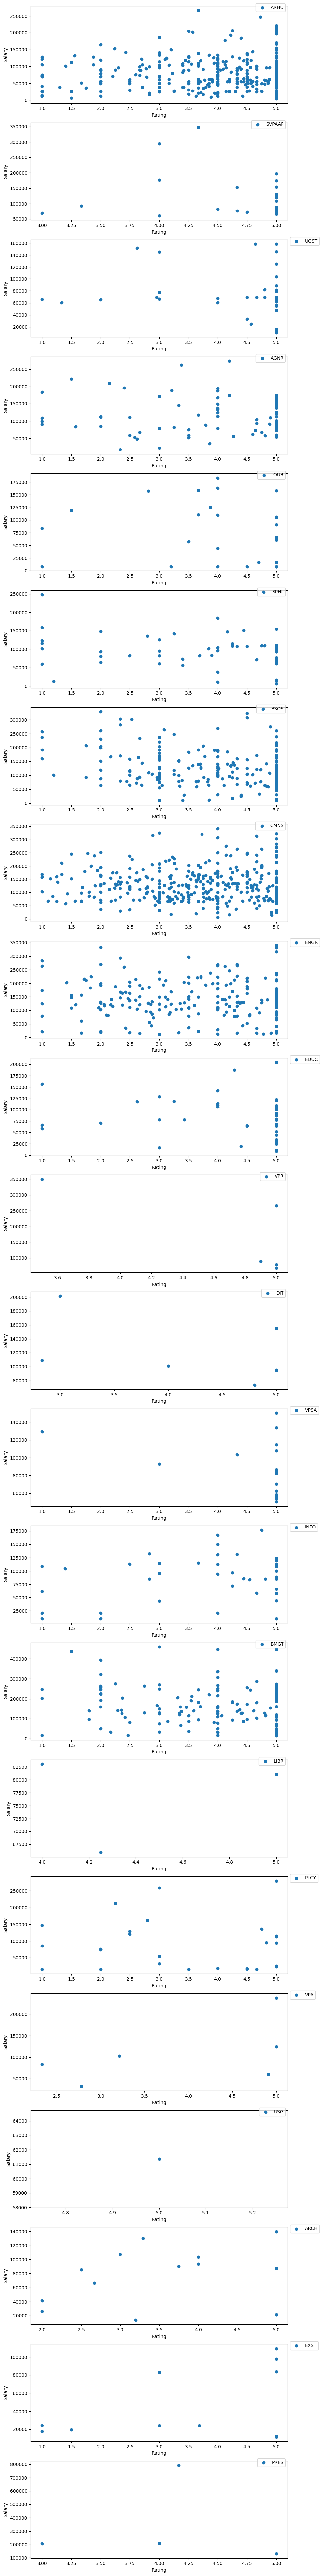

In [24]:
# Plotting scatterplots for each department
plt.figure(figsize=(400,400))
fig, ax = plt.subplots(len(data["Department"].unique()), figsize = (10,100))

# plot for each team (a unique color used for each)
for i in range(len(data["Department"].unique())):
    dept = data["Department"].unique()[i]
    cur_dept_df = data[data["Department"] == dept] # dataframe of a specific team from the period
    cur_dept_df = cur_dept_df[cur_dept_df["average_rating"].notnull()]
    ax[i].scatter(cur_dept_df["average_rating"], cur_dept_df["Salary"], label = dept)
    
    # graph settings
    ax[i].legend(bbox_to_anchor=(1.0, 1.05))
    ax[i].set_xlabel("Rating")
    ax[i].set_ylabel("Salary")

plt.show()

To answer my second question, looking at the first scatterplot, overall, the data seems to have a wide range of salaries for any given rating, as seen by the vertical lines formed for each integer rating and the scattered points between them. When grouped by department, while some departments have more review data than others, the points also seem to be very scattered, such as in the ARHU and CMNS departments. Overall,  there isn't much of a correlation between the ratings a professor gets and their salaries.

In order to investigate other possible correlations with average rating and other variables, I am going to use a heatmap to visually examine possible correlations and  create my hypothesis. A heatmap uses color to indicate the strength of the correlation for all pairs of the variables in a dataset. One visualization library that allows us to do that is seaborn, a library based on matplotlib. You could find out more about how to use their API at the following link: https://seaborn.pydata.org/api.html.

Note that I had to one-hot encode the department column - you can find a basic summary of what it is and how to use it over here: https://www.educative.io/blog/one-hot-encoding.


In [25]:
import seaborn as sns 
#Creating heatmap and one-hot encoding all of the departments for the heatmap
heatmap_data = data
heatmap_data = pd.get_dummies(data,columns=['Department'])

In [26]:
#Converting average rating to type float 
heatmap_data["average_rating"] = heatmap_data["average_rating"].apply(lambda x: float(x))

/tmp/ipykernel_49882/1552141191.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmap_data.corr(), cmap ="YlGnBu")


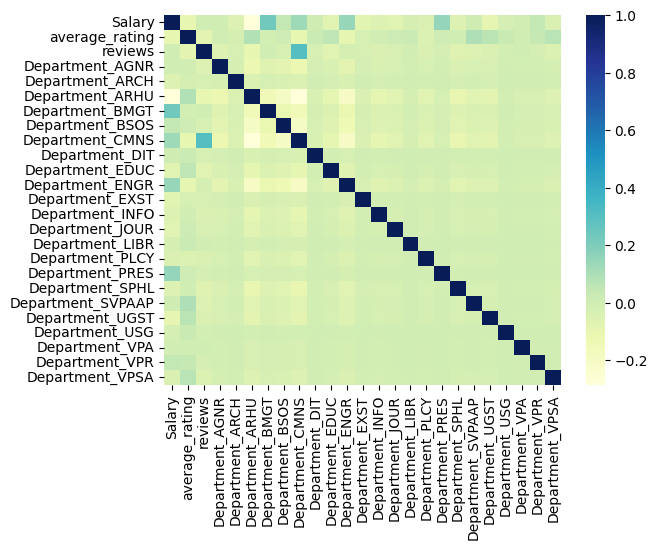

In [27]:
#Generating heatmap 
sns.heatmap(heatmap_data.corr(), cmap ="YlGnBu")
sns.set(rc={'figure.figsize':(15,15)})

As seen above, the heatmap seems to overall show no correlation between most variables, indicated by their green color. There are certain outliers, such as the blue cell showing the correlation between the number of reviews and the CMNS department. But for the sake of this project, what seems more interesting is that there seems to be some positive correlation for the average rating row, specifically between rating and certain departments such as the ARHU, SVPAAP, etc. There are also a few negative correlations such as between the average rating and the CMNS department. I can use a hypothesis test to see if these correlations are significant.

## Hypothesis Testing 

**Hypothesis Statement**: There is a correlation present between the salary and department of a professor and their average rating 

**Null Hypothesis**:  There is *no* correlation present between the salary and department of a professor and their average rating 

The hypothesis test I am going to utilize is the ANOVA test, which will allow me to determine the statistical difference between categorical and continuous data using the variance. Because I hypothesized that there is a correlation present between department and average rating, the ANOVA test is the most suitible way to test my hypothesis in comparison to other statistical tests since department is a categorical variable. To look into more information about ANOVA tests, you can refer to this link: https://www.tibco.com/reference-center/what-is-analysis-of-variance-anova

In [28]:
import statsmodels.formula.api as smf
#Conducting a one-way ANOVA test between departments and average rating
anova_df = heatmap_data[['average_rating','Department_AGNR','Department_ARCH','Department_BMGT','Department_BSOS','Department_CMNS','Department_DIT','Department_EDUC','Department_ENGR',
                        'Department_EXST','Department_INFO','Department_JOUR','Department_LIBR','Department_PLCY','Department_PRES','Department_SPHL','Department_SVPAAP','Department_UGST',
                        'Department_USG','Department_VPA','Department_VPR','Department_VPSA', 'Salary']]
anova = smf.ols(formula='average_rating ~ Salary+Department_AGNR+Department_ARCH+Department_BMGT+Department_BSOS+Department_CMNS+Department_DIT+Department_EDUC+Department_ENGR+Department_EXST+Department_INFO+Department_JOUR+Department_LIBR+Department_PLCY+Department_PRES+Department_SPHL+Department_SVPAAP+Department_UGST+Department_USG+Department_VPA+Department_VPR+Department_VPSA', data=anova_df).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.029
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.14e-09
Time:                        22:23:57   Log-Likelihood:                -2668.9
No. Observations:                1737   AIC:                             5384.
Df Residuals:                    1714   BIC:                             5509.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1037      0.067     61.579      0.000       3.973       4.234
Salary             -1.01e-06   4.35e-07     -2.319      0.020   -1.86e-06   -1.56e-07
Department_AGNR      -0.1609      0.143     -1.125      0.261      -0.442       0.120
Department_ARCH      -0.4291      0.308     -1.393      0.164      -1.033       0.175
Department_BMGT      -0.1244      0.121     -1.024      0.306      -0.363       0.114
Department_BSOS      -0.0977      0.099     -0.982      0.326      -0.293       0.097
Department_CMNS      -0.3366      0.085     -3.957      0.000      -0.504      -0.170
Department_DIT        0.2493      0.432      0.577      0.564      -0.598       1.097
Department_EDUC       0.2291      0.180      1.271      0.204      -0.124       0.583
Department_ENGR      -0.3790      0.100     -3.798      0.000      -0.575      -0.183
Department_EXST      -0.5860      0.346     -1.691      0.091      -1.266       0.094
Department_INFO      -0.1974      0.184     -1.072      0.284      -0.558       0.164
Department_JOUR      -0.0485      0.229     -0.211      0.833      -0.499       0.402
Department_LIBR       0.3904      0.656      0.595      0.552      -0.897       1.678
Department_PLCY      -0.5971      0.230     -2.601      0.009      -1.047      -0.147
Department_PRES       0.2758      0.580      0.475      0.635      -0.862       1.413
Department_SPHL      -0.1707      0.156     -1.092      0.275      -0.477       0.136
Department_SVPAAP     0.6999      0.222      3.149      0.002       0.264       1.136
Department_UGST       0.2954      0.193      1.534      0.125      -0.082       0.673
Department_USG        0.9583      1.134      0.845      0.398      -1.265       3.182
Department_VPA       -0.1238      0.466     -0.266      0.791      -1.038       0.790
Department_VPR        0.7485      0.511      1.464      0.143      -0.254       1.751
Department_VPSA       0.6131      0.273      2.245      0.025       0.077       1.149
==============================================================================
Omnibus:                      153.554   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.643
Skew:                          -0.820   Prob(JB):                     3.29e-43
Kurtosis:                       2.887   Cond. No.                     5.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After using a ANOVA test to see the statistical differences between each department and average rating, I found that the CMNS, ENGR, PLCY, SVPAAP and VPSA departments have p-values (shown as P > |t|) below 0.05, while the rest of the departments have p-values above 0.05 which means my hypothesis is somewhat correct but the null hypothesis is also somewhat correct as well. I also see that the p-value for the relationship between salary and the average rating is below 0.05. Because of this, I cannot completely reject the null hypothesis. 

## Machine Learning 

Since my hypothesis seems to be right for salary, right for some departments and wrong for others , I became curious as to how accurately a machine learning algorithm would predict a professor's rating based on their department and salary. The machine learning algorithm that I will be using to classify a professor's rating based on their department is the Random Forest Regression algorithm. It's an algorithm that uses random forests to predict a for a target continous value. You can view more information about random forest regression here: 
https://www.keboola.com/blog/random-forest-regression

We'll be using the sklearn library, a popular Python machine learning library. You could find their official user guide here: https://scikit-learn.org/stable/user_guide.html.

The random forest regression algorithm suits our goal in this case as we want to predict a professor's average rating, a continuous value betwen 1 and 5.

In [29]:
heatmap_data.columns

Index(['Division', 'Title', 'Employee', 'Salary', 'name', 'courses',
       'average_rating', 'type', 'reviews', 'slug', 'Department_AGNR',
       'Department_ARCH', 'Department_ARHU', 'Department_BMGT',
       'Department_BSOS', 'Department_CMNS', 'Department_DIT',
       'Department_EDUC', 'Department_ENGR', 'Department_EXST',
       'Department_INFO', 'Department_JOUR', 'Department_LIBR',
       'Department_PLCY', 'Department_PRES', 'Department_SPHL',
       'Department_SVPAAP', 'Department_UGST', 'Department_USG',
       'Department_VPA', 'Department_VPR', 'Department_VPSA'],
      dtype='object')

In [30]:
# Separating input data (department and salary) from target value (average_rating)  
X = heatmap_data.iloc[:,10:] # gets all one hot encoded department data 
X["Salary"] = data["Salary"]
X

,Department_AGNR,Department_ARCH,Department_ARHU,Department_BMGT,Department_BSOS,Department_CMNS,Department_DIT,Department_EDUC,Department_ENGR,Department_EXST,...,Department_PLCY,Department_PRES,Department_SPHL,Department_SVPAAP,Department_UGST,Department_USG,Department_VPA,Department_VPR,Department_VPSA,Salary
1820,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88397.97
1393,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,106276.58
675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,153578.10
2633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,54973.89
681,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,153115.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,74537.66
631,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,157651.56
3163,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12424.21
2149,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,74656.02


In [31]:
rating_outcomes = heatmap_data['average_rating']
rating_outcomes

1820    5.0
1393    5.0
675     5.0
2633    5.0
681     5.0
       ... 
2158    1.0
631     1.0
3163    1.0
2149    1.0
2360    1.0
Name: average_rating, Length: 1737, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
#Dividing data into testing and training data by half 
X_train, X_test, Y_train, Y_test = train_test_split(X, rating_outcomes, train_size  = 0.5, random_state = 4)

In [33]:
Y_train.shape

(868,)

In [34]:
X_train

,Department_AGNR,Department_ARCH,Department_ARHU,Department_BMGT,Department_BSOS,Department_CMNS,Department_DIT,Department_EDUC,Department_ENGR,Department_EXST,...,Department_PLCY,Department_PRES,Department_SPHL,Department_SVPAAP,Department_UGST,Department_USG,Department_VPA,Department_VPR,Department_VPSA,Salary
1053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123657.93
1516,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101027.58
419,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,186486.80
188,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,237163.75
2287,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,68757.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9000.00
1023,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125072.68
1628,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95986.31
977,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,127810.37


In [38]:
Y_train

1053    5.0
1516    4.4
419     4.0
188     3.0
2287    3.4
       ... 
3262    5.0
1023    4.5
1628    5.0
977     5.0
2843    3.5
Name: average_rating, Length: 868, dtype: float64

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [40]:
# #Converting the ratings into categorical types for the Logistic model 

#Fitting the logistice regression model to the training set
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, Y_train)
regressor.score(X_train,Y_train)

0.7979504397701201

In [41]:
regressor.score(X_test,Y_test)

-0.2369821873788145

After using a logistic regression model, I found that the accuracy (how correct my machine learning algortihm was) for my model is pretty good for my training set with a coefficient of determination of 79.8%. On the other hand, it did pretty horrible when predicting on the test set, with a negative coefficient of determination. According to sklearn, a negative coefficient of determination means the model is doing "arbitrarily worse". This shows that our algorithm is "overfitting" i.e 'memorizing' our data to predict the rating rather than making generalizations (for more details on what this negative score means, see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score)

## Communication of Insight 


In this tutorial, we tried to see whether UMD needs better rated professors by scraping salary data and rating data from https://salaryguide.dbknews.com/ and PlanetTerp. We then cleaned the data so that we only look at data corresponding to professor who we know their salary and rating data. We first saw that overall, there are a lot of highly rated professors - in fact , most of the professors from the data we selected seem to have 5 stars. Still, we wanted to see whether there was anything being hidden from this data.So we did some data analysis by taking a look at how ratings compare by department as well to see if there was any department which was lacking good professors. We found that some, such as the PLCY department, were lacking good professors compared to the other departments. We then visualized individual correlations through a heat map and ran a hypothesis test to see how significant they were. The hypothesis test revealed that there is somewhat of a negative correlation between salary and average rating. Overall, however, when we tried to see if a machine learning model, namely a Random Forest Regressor model, could figure out any patterns, we saw that it failed to do so, overfitting on the data instead.  

These insights are helpful because they show that some departments need better rated professors. But more importantly, it shows that good rated professors aren't really getting more compensation for their work. So does UMD need better rated professors? Well, while we do seem to have a good chunk of good professors, we could get more by paying professors for being more helpful to their students.